Code for predicting best area in the city to build a new hotel. 

In [1]:
# Installing and Importing Libraries
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
%matplotlib inline
print('Libraries imported !')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.2
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
    

In [9]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

In [2]:
CLIENT_ID = '20T1IHTMLPWETUJ3MCTZ1PVKWQKSW4X5KUNNTKXLFRHWLBD3' # your Foursquare ID
CLIENT_SECRET = 'SE31OGAPQFRWJ0SEPAQIR5PUSEQ2AFCLG1DHWULTQQ3L0D3I' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 20T1IHTMLPWETUJ3MCTZ1PVKWQKSW4X5KUNNTKXLFRHWLBD3
CLIENT_SECRET:SE31OGAPQFRWJ0SEPAQIR5PUSEQ2AFCLG1DHWULTQQ3L0D3I


Data Acquisition and Cleaning

In [3]:
address = 'Viña del Mar'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


print(latitude, longitude)

-33.0244535 -71.5517636


In [4]:
search_query = 'hotel'
radius = 10000
print(search_query + ' .... OK!')


hotel .... OK!


In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

url


'https://api.foursquare.com/v2/venues/search?client_id=20T1IHTMLPWETUJ3MCTZ1PVKWQKSW4X5KUNNTKXLFRHWLBD3&client_secret=SE31OGAPQFRWJ0SEPAQIR5PUSEQ2AFCLG1DHWULTQQ3L0D3I&ll=-33.0244535,-71.5517636&v=20180604&query=hotel&radius=10000&limit=100'

In [6]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f271d80f7854f0f27c02e1a'},
 'response': {'venues': [{'id': '4b562174f964a520ce0128e3',
    'name': "Hotel O'Higgins",
    'location': {'address': 'Arlegui 777',
     'crossStreet': 'Plaza Latorre',
     'lat': -33.02369588260692,
     'lng': -71.55153647311573,
     'labeledLatLngs': [{'label': 'display',
       'lat': -33.02369588260692,
       'lng': -71.55153647311573}],
     'distance': 86,
     'cc': 'CL',
     'city': 'Viña del Mar',
     'state': 'Valparaíso',
     'country': 'Chile',
     'formattedAddress': ['Arlegui 777 (Plaza Latorre)',
      'Viña del Mar',
      'Valparaíso',
      'Chile']},
    'categories': [{'id': '4bf58dd8d48988d1fa931735',
      'name': 'Hotel',
      'pluralName': 'Hotels',
      'shortName': 'Hotel',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1596399479',
    'hasPerk': False},
   {'id': '4b7d4d51f964a5

In [10]:
# assign relevant part of JSON to venues
venues = results['response']['venues']
venues
# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.cc,location.city,location.state,location.country,location.formattedAddress,location.postalCode
0,4b562174f964a520ce0128e3,Hotel O'Higgins,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1596399479,False,Arlegui 777,Plaza Latorre,-33.023696,-71.551536,"[{'label': 'display', 'lat': -33.0236958826069...",86,CL,Viña del Mar,Valparaíso,Chile,"[Arlegui 777 (Plaza Latorre), Viña del Mar, Va...",NaN
1,4b7d4d51f964a52030b72fe3,Hotel Gala,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1596399479,False,Arlegui 263,Traslaviña,-33.022343,-71.558567,"[{'label': 'display', 'lat': -33.0223426433246...",677,CL,Viña del Mar,Valparaíso,Chile,"[Arlegui 263 (Traslaviña), Viña del Mar, Valpa...",NaN
2,4d963bbc2bd6f04d1bcd3150,Hotel Mare Nostrum,"[{'id': '4bf58dd8d48988d130941735', 'name': 'B...",v-1596399479,False,4 norte 646,1 poniente,-33.019448,-71.551786,"[{'label': 'display', 'lat': -33.0194478948408...",557,CL,Viña del Mar,Valparaíso,Chile,"[4 norte 646 (1 poniente), Viña del Mar, Valpa...",NaN
3,4e3df69d483b04e17a9e2afd,Hotel Ágora,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1596399479,False,5 1/2 Poniente 253,NaN,-33.018826,-71.557942,"[{'label': 'display', 'lat': -33.0188256239553...",851,CL,Viña del Mar,Valparaíso,Chile,"[5 1/2 Poniente 253, Viña del Mar, Valparaíso,...",NaN
4,4b7a96a7f964a52088322fe3,Hotel Best Western Marina del Rey,"[{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...",v-1596399479,False,Ecuador #299,NaN,-33.024884,-71.559671,"[{'label': 'display', 'lat': -33.0248839481679...",739,CL,Viña del Mar,Valparaíso,Chile,"[Ecuador #299, 2571530 Viña del Mar, Valparaís...",2571530


In [11]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Scatter Plot Methology

In [12]:
X = dataframe['location.lat']

In [13]:
Y = dataframe['location.lng']

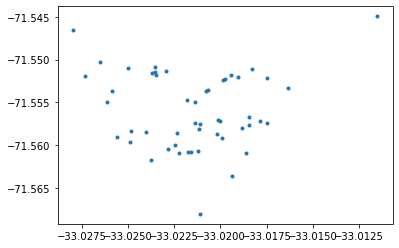

In [14]:
plt.scatter(X, Y, marker='.')

RESULTS - Visualizing through Map -

In [18]:
# create map and display it
viña_map = folium.Map(location=[latitude, longitude], zoom_start=14)

# display the map of San Francisco
viña_map

In [21]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(dataframe['location.lat'], dataframe['location.lng']):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

latitudes = list(dataframe['location.lat'])
longitudes = list(dataframe['location.lng'])
labels = list(dataframe.name)
# labels = ['cafe']

# for lat, lng, label in zip(latitudes, longitudes, labels):
#     folium.Marker([lat, lng], popup=label).add_to(sanfran_map)   

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=folium.Popup(label, parse_html=True, max_width='100%')).add_to(vi_map)   
    
    
# add incidents to map
viña_map.add_child(incidents)